<aside>
💡 Question-1:

Given preorder of a binary tree, calculate its **[depth(or height)](https://www.geeksforgeeks.org/write-a-c-program-to-find-the-maximum-depth-or-height-of-a-tree/)** [starting from depth 0]. The preorder is given as a string with two possible characters.

1. ‘l’ denotes the leaf
2. ‘n’ denotes internal node

The given tree can be seen as a full binary tree where every node has 0 or two children. The two children of a node can ‘n’ or ‘l’ or mix of both.

**Examples :**

Input  : nlnll
Output : 2
Explanation :

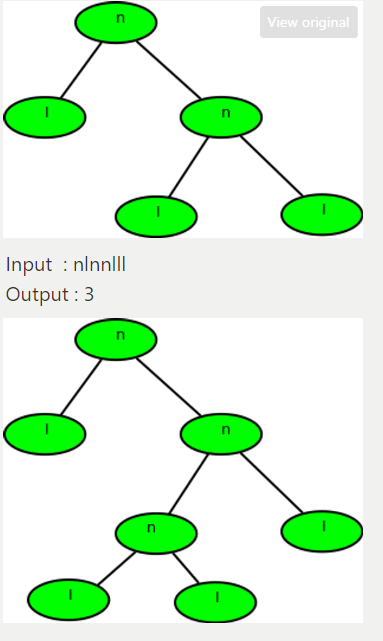

</aside>

In [1]:
def findDepthRec(tree, n, index) :
 
    if (index[0] >= n or tree[index[0]] == 'l'):
        return 0
 
    # calc height of left subtree (In preorder left subtree is processed before right)
    index[0] += 1
    left = findDepthRec(tree, n, index)
 
    # calc height of right subtree
    index[0] += 1
    right = findDepthRec(tree, n, index)
    return (max(left, right) + 1)
 
# Wrapper over findDepthRec()
def findDepth(tree, n) :
 
    index = [0]
    return findDepthRec(tree, n, index)
 
         
# Driver program to test above functions
if __name__ == '__main__':
    tree= "nlnnlll"
    n = len(tree)
 
    print(findDepth(tree, n))

3


<aside>
💡 Question-2:

Given a Binary tree, the task is to print the **left view** of the Binary Tree. The left view of a Binary Tree is a set of leftmost nodes for every level.

**Examples:**

***Input:***

            4

          /   \

        5     2

             /   \

            3     1

           /  \

          6    7

***Output:** 4 5 3 6*

**Explanation:**

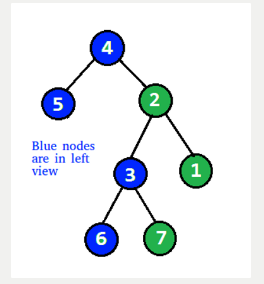

***Input:***

                    1

                  /   \

                2       3

                 \

                   4

                     \

                        5

                           \

                             6

**Output:** 1 2 4 5 6

</aside>

In [2]:
# A binary tree node
class Node:
 
    # Constructor to create a new node
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
 
 
# Recursive function print left view of a binary tree
def leftViewUtil(root, level, max_level):
 
    # Base Case
    if root is None:
        return
 
    # If this is the first node of its level
    if (max_level[0] < level):
        print (root.data, end = " ")
        max_level[0] = level
 
    # Recur for left and right subtree
    leftViewUtil(root.left, level + 1, max_level)
    leftViewUtil(root.right, level + 1, max_level)
 
 
# A wrapper over leftViewUtil()
def leftView(root):
    max_level = [0]
    leftViewUtil(root, 1, max_level)
 
 
# Driver program to test above function
if __name__ == '__main__':
    root = Node(10)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(7)
    root.left.right = Node(8)
    root.right.right = Node(15)
    root.right.left = Node(12)
    root.right.right.left = Node(14)
     
    leftView(root)

# tc = O(n)
# sc = O(h) height of tree

10 2 7 14 

<aside>
💡 Question-3:

Given a Binary Tree, print the Right view of it.

The right view of a Binary Tree is a set of nodes visible when the tree is visited from the Right side.

**Examples:**

**Input:**

         1

      /     \

   2         3

/   \       /  \

4     5   6    7

             \

               8

**Output**: 

Right view of the tree is 1 3 7 8

**Input:**

         1

       /

    8

  /

7

**Output**: 

Right view of the tree is 1 8 7

</aside>

In [3]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
 
 
def rightSideView(root):
    res = []
    curr = root
    while curr:
        if not curr.right:  # if there is no right child, add the current node's value to the vector
            res.append(curr.val)
            curr = curr.right  # move to the right child

        else:  # if there is a right child
            next = curr.right  # set the next node to the right child

            while next.left and next.left != curr:
                # traverse the left subtree of the right
                # child untill a leaf node or the current node is reached
                next = next.left
 
            if not next.left:  # if the left child of the next node is NULL
                res.append(curr.val)
                next.left = curr
                curr = curr.right
            else:
                next.left = None
                curr = curr.left
    return res
 
 
# Driver code
if __name__ == '__main__':
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)
    root.right.left = TreeNode(6)
    root.right.right = TreeNode(7)
    root.right.right.right = TreeNode(8)
    res = rightSideView(root)
    for i in res:
        print(i, end=" ")
    print()


# tc = O(n)
# sc = O(1)

1 3 7 8 


<aside>
💡 Question-4:

Given a Binary Tree, The task is to print the **bottom view** from left to right. A node **x** is there in output if x is the bottommost node at its horizontal distance. The horizontal distance of the left child of a node x is equal to a horizontal distance of x minus 1, and that of a right child is the horizontal distance of x plus 1.

**Examples:**

**Input:**

             20

           /     \

        8         22

    /      \         \

5         3        25

        /    \

   10       14

**Output:** 5, 10, 3, 14, 25.

**Input:**

             20

           /     \

        8         22

    /      \      /   \

 5         3    4     25

         /    \

     10       14

**Output:**

5 10 4 14 25.

**Explanation:**

If there are multiple bottom-most nodes for a horizontal distance from the root, then print the later one in the level traversal.

**3 and 4** are both the bottom-most nodes at a horizontal distance of 0, we need to print 4.

</aside>

In [4]:
from collections import deque, defaultdict
 
# Tree node class
class Node:
   
    # data of the node
    def __init__(self, key):
        self.data = key
         
        # horizontal distance of the node
        self.hd = float("inf")
         
        #left and right references
        self.left = None
        self.right = None
 
def printBottomView(root):
    if root is None: 
        return #if root is NULL
    
    hash = defaultdict(lambda : 0) # <vertical_index , root->data>
    leftmost = 0 # to store the leftmost index so that we move from left to right
    q = deque() # pair<Node*,vertical Index>  for level order traversal.
    q.append((root, 0)) # push the root and 0 vertial index

    while q:
        top = q.popleft() #  store q.front() in top variable
        temp, ind = top # store the Node in temp for left and right nodes and store the vertical index of current node
        hash[ind] = temp.data # store the latest vertical_index(key) -> root->data(value)
        leftmost = min(ind, leftmost) # have the leftmost vertical index

        if temp.left: 
            q.append((temp.left, ind-1)) # check if any node of left then go in negative direction
        
        if temp.right: 
            q.append((temp.right, ind+1)) #check if any node of left then go in positive direction


    #Traverse each value in hash from leftmost to positive side till key is available   
    for i in range(leftmost, len(hash)):
          if hash[i]:
            print(hash[i], end=" ")
 
root = Node(20)
root.left = Node(8)
root.right = Node(22)
root.left.left = Node(5)
root.left.right = Node(3)
root.right.left = Node(4)
root.right.right = Node(25)
root.left.right.left = Node(10)
root.left.right.right = Node(14)
print("Bottom view of the given binary tree :")
printBottomView(root)

# tc = O(n) = sc

Bottom view of the given binary tree :
5 10 4 14 25 